<a href="https://colab.research.google.com/github/HumayDS/Digital-Data-Analytics-spring-2024-/blob/main/Lesson%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Activate package
import numpy as np
import pandas as pd

In [75]:
##Getting dataset
df = pd.read_csv('https://raw.githubusercontent.com/HumayDS/Digital-Data-Analytics-spring-2024-/main/tips_2.csv')

In [76]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [77]:
df.shape

(244, 7)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         241 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [79]:
df.isnull().sum()

total_bill    0
tip           3
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,241.0,3.490415,4.665933,1.00,2.0000,2.920,3.7100,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [81]:
df.corr()

<ipython-input-81-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.247719,0.598315
tip,0.247719,1.000000,0.084956
size,0.598315,0.084956,1.000000


In [82]:
#Unique values
df.nunique()

total_bill    229
tip           122
gender          2
smoker          2
day             4
time            2
size            6
dtype: int64

In [83]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [84]:
  #working with types
  df['gender'] = df['gender'].astype('category')
  df['smoker'] = df['smoker'].astype('category')
  df['day'] = df['day'].astype('category')
  df['time'] = df['time'].astype('category')
  df['size'] = df['size'].astype('int64')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         241 non-null    float64 
 2   gender      244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [86]:
# Adding new column
df["average_bill"] = df["total_bill"] / df["size"]
df.head()

,total_bill,tip,gender,smoker,day,time,size,average_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,NaN,Female,No,Sun,Dinner,4,6.147500


In [87]:
#  drop average bill

df.drop(columns=["average_bill"], inplace=True)
df.head()


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [88]:
#  create column if size > 2 , write 'less', 'more'

df['size_category'] = np.where(df['size'] > 2, 'more', 'less')


In [89]:
df.head()

,total_bill,tip,gender,smoker,day,time,size,size_category
0,16.99,1.01,Female,No,Sun,Dinner,2,less
1,10.34,1.66,Male,No,Sun,Dinner,3,more
2,21.01,3.50,Male,No,Sun,Dinner,3,more
3,23.68,3.31,Male,No,Sun,Dinner,2,less
4,24.59,NaN,Female,No,Sun,Dinner,4,more


In [90]:
df.drop('size_category' , axis = 1 ,inplace = True)

In [91]:
#  create column, if size < 2 , write 'less' between 2 and 5 , write 'orta', else 'chox'

df['size_category'] = np.select(
    [df['size'] < 2, (df['size'] >= 2) & (df['size'] < 5), df['size'] >= 5],
    ['less', 'orta', 'chox']
)

df.head()


,total_bill,tip,gender,smoker,day,time,size,size_category
0,16.99,1.01,Female,No,Sun,Dinner,2,orta
1,10.34,1.66,Male,No,Sun,Dinner,3,orta
2,21.01,3.50,Male,No,Sun,Dinner,3,orta
3,23.68,3.31,Male,No,Sun,Dinner,2,orta
4,24.59,NaN,Female,No,Sun,Dinner,4,orta


In [92]:
df.drop('size_category' , axis = 1 ,inplace = True)

In [93]:
df.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [94]:

df.sort_values(by='tip', ascending = False)

,total_bill,tip,gender,smoker,day,time,size
179,34.63,50.0,Male,Yes,Sun,Dinner,2
110,14.00,42.0,Male,No,Sat,Dinner,2
24,19.82,36.0,Male,No,Sat,Dinner,2
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
92,5.75,1.0,Female,Yes,Fri,Dinner,2
67,3.07,1.0,Female,Yes,Sat,Dinner,1
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4


In [95]:

# select 0 : 3
df.iloc[0:3]

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [96]:

#select rows 0:3 , columns 0:2
df.iloc[:3,:2]


,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [97]:
#FIltering
df.iloc[20:40 , 2]

20      Male
21    Female
22    Female
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29    Female
30      Male
31      Male
32    Female
33    Female
34      Male
35      Male
36      Male
37    Female
38      Male
39      Male
Name: gender, dtype: category
Categories (2, object): ['Female', 'Male']

In [98]:
#filtering
df.iloc[20 , 2]

'Male'

In [99]:
# tip > 5
df[df.tip > 5]

,total_bill,tip,gender,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
110,14.00,42.00,Male,No,Sat,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


In [100]:
# prompt: filter tip > 5 and total_bill < 20
## and --->>> &
### or ----->> |
df[(df['tip'] > 5) & (df['total_bill'] < 20)]


,total_bill,tip,gender,smoker,day,time,size
24,19.82,36.00,Male,No,Sat,Dinner,2
110,14.00,42.00,Male,No,Sat,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2


In [101]:
#check nulls
df.isnull().sum()

total_bill    0
tip           3
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

In [102]:
# Filter where tip is null

df[df['tip'].isnull()]


,total_bill,tip,gender,smoker,day,time,size
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4
79,17.29,NaN,Male,No,Thur,Lunch,2


In [103]:
# delete nulls
df_1 = df.dropna()

In [104]:
df_1.shape
df_1.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: ylabel='Frequency'>

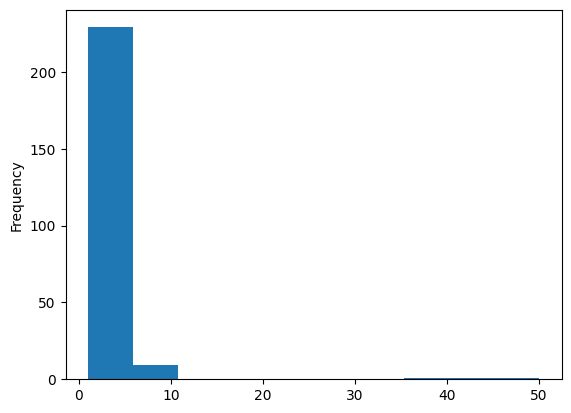

In [105]:
#histogram tip

df['tip'].plot.hist(bins=10)


In [106]:
# skewness tip

df['tip'].skew()


7.9535924021294395

<Axes: ylabel='Frequency'>

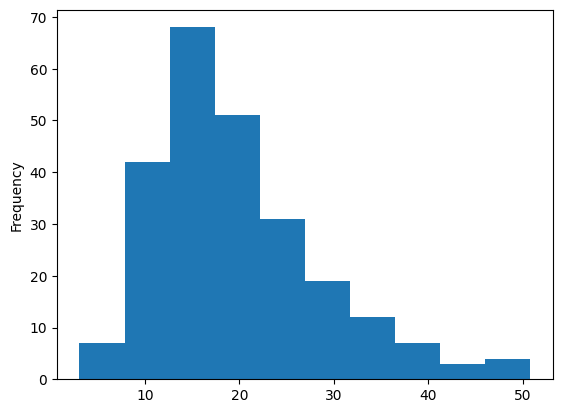

In [107]:
#  histogram total bill

df['total_bill'].plot.hist(bins=10)


<Axes: >

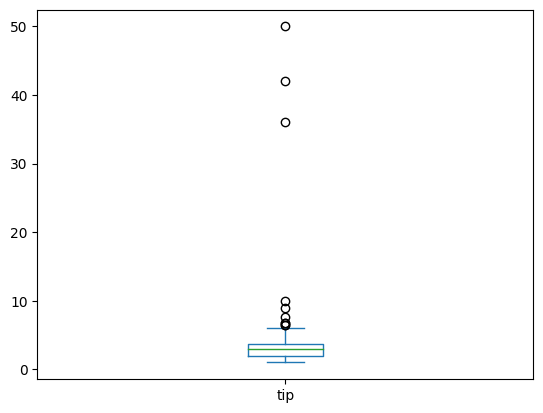

In [108]:
#  boxplot tip

df['tip'].plot.box()


In [109]:
# skewness total_bill

df['total_bill'].skew()


1.1332130376158205

In [110]:
#fill with 0
df.fillna(0)

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,0.00,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [111]:
#  df fill na's with mean

df.fillna(df.mean())


<ipython-input-111-1d1cfb6411bd>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean())


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.920000,Male,No,Sat,Dinner,3
240,27.18,2.000000,Female,Yes,Sat,Dinner,2
241,22.67,2.000000,Male,Yes,Sat,Dinner,2
242,17.82,1.750000,Male,No,Sat,Dinner,2


In [112]:
# fill na's with median

df  = df.fillna(df.median())


<ipython-input-112-0b2ce0f2aaef>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df  = df.fillna(df.median())


In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,3.483402,4.637470,1.00,2.0000,2.920,3.6875,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [114]:
##Outlier bounds for tip
IQR = df['tip'].quantile(0.75) - df['tip'].quantile(0.25)
lower_limit = df['tip'].quantile(0.25) - 2 * IQR
upper_limit = df['tip'].quantile(0.75) + 2 * IQR
print(lower_limit)
print(upper_limit)

-1.375
7.0625


In [115]:
df[(df['tip']  < lower_limit ) | (df['tip'] > upper_limit)]

,total_bill,tip,gender,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
110,14.00,42.00,Male,No,Sat,Dinner,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
179,34.63,50.00,Male,Yes,Sun,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4


In [116]:
q3 = df['tip'].quantile(0.75)

In [117]:
df.loc[(df['tip'] < lower_limit) | (df['tip'] > upper_limit), 'tip'] = q3

In [118]:
##Outlier bounds for tip
IQR = df['total_bill'].quantile(0.75) - df['total_bill'].quantile(0.25)
lower_limit = df['total_bill'].quantile(0.25) - 1.5 * IQR
upper_limit = df['total_bill'].quantile(0.75) + 1.5 * IQR
print(lower_limit)
print(upper_limit)

-2.8224999999999945
40.29749999999999


In [119]:
df[(df['total_bill']  < lower_limit ) | (df['total_bill'] > upper_limit)]

,total_bill,tip,gender,smoker,day,time,size
59,48.27,6.7300,Male,No,Sat,Dinner,4
102,44.30,2.5000,Female,Yes,Sat,Dinner,3
142,41.19,5.0000,Male,No,Thur,Lunch,5
156,48.17,5.0000,Male,No,Sun,Dinner,6
170,50.81,3.6875,Male,Yes,Sat,Dinner,3
182,45.35,3.5000,Male,Yes,Sun,Dinner,3
184,40.55,3.0000,Male,Yes,Sun,Dinner,2
197,43.11,5.0000,Female,Yes,Thur,Lunch,4
212,48.33,3.6875,Male,No,Sat,Dinner,4


In [120]:
q3 = df['total_bill'].quantile(0.75)

In [121]:
df.loc[(df['total_bill'] < lower_limit) | (df['total_bill'] > upper_limit), 'total_bill'] = q3

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,18.995236,7.368476,3.07,13.3475,17.795,24.091875,40.17
tip,244.0,2.940553,1.217166,1.00,2.0000,2.920,3.681875,6.73
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.000000,6.00


In [123]:
df.corr()

<ipython-input-123-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.612373,0.581834
tip,0.612373,1.000000,0.496077
size,0.581834,0.496077,1.000000


<Axes: ylabel='Frequency'>

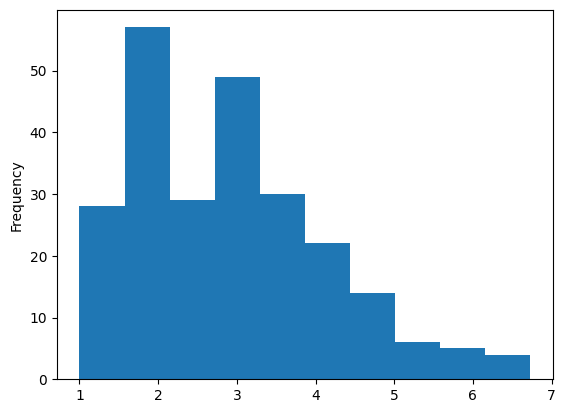

In [124]:
#Histogram tip again

df['tip'].plot.hist(bins=10)


In [125]:
#  skewness tip again

df['tip'].skew()


0.7920051611741294

<Axes: >

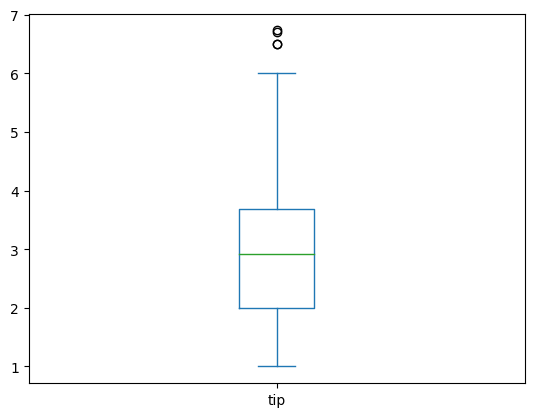

In [126]:
#  boxplot tip

df['tip'].plot.box()


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   gender      244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Dummy Variable

In [128]:
##Dummy variable
dmy = pd.get_dummies(df.select_dtypes('category') )
dmy.head()
cat_columns = df.select_dtypes('category')
num_cols = df.drop(cat_columns , axis = 1)
df_dummy = pd.concat([num_cols , dmy] , axis= 1)
df_dummy.head()


,total_bill,tip,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,2.92,4,1,0,1,0,0,0,1,0,1,0


In [129]:
corr = df_dummy.corr()
corr

,total_bill,tip,size,gender_Female,gender_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.612373,0.581834,-0.140552,0.140552,-0.069200,0.069200,-0.072858,0.035623,0.146630,-0.150322,0.199207,-0.199207
tip,0.612373,1.000000,0.496077,-0.070499,0.070499,-0.001136,0.001136,-0.049239,-0.064600,0.170164,-0.079627,0.107144,-0.107144
size,0.581834,0.496077,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
gender_Female,-0.140552,-0.070499,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
gender_Male,0.140552,0.070499,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.069200,-0.001136,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.069200,0.001136,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.072858,-0.049239,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.035623,-0.064600,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.146630,0.170164,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


In [130]:
##Dummy variable
dmy = pd.get_dummies(df.select_dtypes('category') ,  drop_first = True)
dmy.head()
cat_columns = df.select_dtypes('category')
num_cols = df.drop(cat_columns , axis = 1)
df_dummy2 = pd.concat([num_cols , dmy] , axis= 1)
df_dummy2.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,2.92,4,0,0,0,1,0,0


In [131]:
df_dummy2.corr()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
total_bill,1.000000,0.612373,0.581834,0.140552,0.069200,0.035623,0.146630,-0.150322,-0.199207
tip,0.612373,1.000000,0.496077,0.070499,0.001136,-0.064600,0.170164,-0.079627,-0.107144
size,0.581834,0.496077,1.000000,0.086195,-0.133178,-0.041121,0.193054,-0.072598,-0.103411
gender_Male,0.140552,0.070499,0.086195,1.000000,0.002816,0.053957,0.168106,-0.194445,-0.205231
smoker_Yes,0.069200,0.001136,-0.133178,0.002816,1.000000,0.155744,-0.181624,-0.128534,-0.054921
day_Sat,0.035623,-0.064600,-0.041121,0.053957,0.155744,1.000000,-0.500682,-0.434480,-0.462709
day_Sun,0.146630,0.170164,0.193054,0.168106,-0.181624,-0.500682,1.000000,-0.392566,-0.418071
day_Thur,-0.150322,-0.079627,-0.072598,-0.194445,-0.128534,-0.434480,-0.392566,1.000000,0.917996
time_Lunch,-0.199207,-0.107144,-0.103411,-0.205231,-0.054921,-0.462709,-0.418071,0.917996,1.000000


In [132]:
#group by smoker tip mean

df.groupby('smoker')['tip'].mean()


smoker
No     2.939470
Yes    2.942312
Name: tip, dtype: float64

In [133]:
# Group by gender male tip

df.groupby('gender')['tip'].mean()


gender
Female    2.825517
Male      3.004299
Name: tip, dtype: float64

In [134]:
# group by day time summarise  tip mean

df.groupby(['day', 'time'])['tip'].mean()


day   time  
Fri   Dinner    2.940000
      Lunch     2.382857
Sat   Dinner    2.835144
      Lunch          NaN
Sun   Dinner    3.247862
      Lunch          NaN
Thur  Dinner    3.000000
      Lunch     2.771148
Name: tip, dtype: float64

In [135]:
# prompt: group by gender smoker

df.groupby(['gender', 'smoker'])['tip'].mean()


gender  smoker
Female  No        2.760741
        Yes       2.931515
Male    No        3.038969
        Yes       2.948250
Name: tip, dtype: float64

In [136]:
df = df_dummy2
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,2.92,4,0,0,0,1,0,0


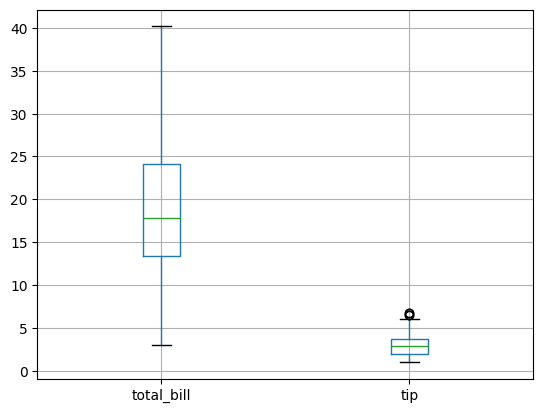

In [137]:
# prompt: boxplot total bill and tip

import matplotlib.pyplot as plt

df.boxplot(column=['total_bill', 'tip'], grid=True)
plt.show()


In [138]:
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,2.92,4,0,0,0,1,0,0


In [139]:
# create copy of
df2 = df.copy()


Feature Scaling


In [140]:
#Standardization -- zscore
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['tip', 'total_bill']
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [141]:
df2.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,-0.272696,-1.589365,2,0,0,0,1,0,0
1,-1.177045,-1.054240,3,1,0,0,1,0,0
2,0.273992,0.460575,3,1,0,0,1,0,0
3,0.637092,0.304154,2,1,0,0,1,0,0
4,0.760844,-0.016921,4,0,0,0,1,0,0


In [149]:
# prompt: mean df2 total_bill

print(df2['total_bill'].mean())
print(df2['total_bill'].std())


-5.4601132358614255e-17
1.00205550062731


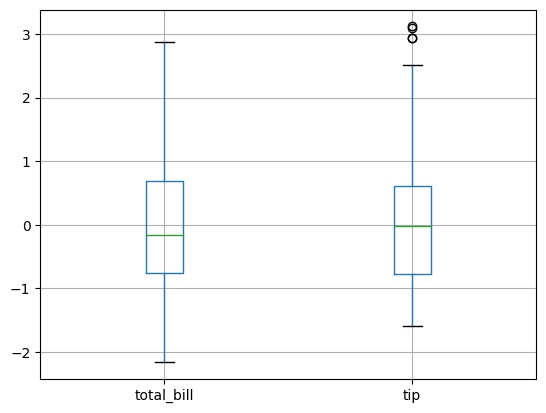

In [142]:
# prompt: boxplot total bill and tip

import matplotlib.pyplot as plt

df2.boxplot(column=['total_bill', 'tip'], grid=True)
plt.show()


In [143]:
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,2.92,4,0,0,0,1,0,0


In [144]:
##Getting logarithm
df['tip'] = np.log1p(df['tip'])
df['total_bill'] = np.log1p(df['total_bill'])


In [145]:
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,2.889816,0.698135,2,0,0,0,1,0,0
1,2.428336,0.978326,3,1,0,0,1,0,0
2,3.091497,1.504077,3,1,0,0,1,0,0
3,3.205993,1.460938,2,1,0,0,1,0,0
4,3.242202,1.366092,4,0,0,0,1,0,0


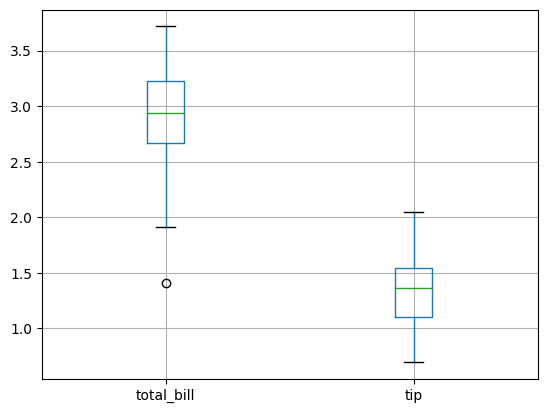

In [146]:
# prompt: boxplot total bill and tip

import matplotlib.pyplot as plt

df.boxplot(column=['total_bill', 'tip'], grid=True)
plt.show()

In [150]:
df.head()

,total_bill,tip,size,gender_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,2.889816,0.698135,2,0,0,0,1,0,0
1,2.428336,0.978326,3,1,0,0,1,0,0
2,3.091497,1.504077,3,1,0,0,1,0,0
3,3.205993,1.460938,2,1,0,0,1,0,0
4,3.242202,1.366092,4,0,0,0,1,0,0


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,2.926766,0.378610,1.403643,2.663572,2.933591,3.222544,3.717710
tip,244.0,1.325868,0.300881,0.693147,1.098612,1.366092,1.543698,2.045109
size,244.0,2.569672,0.951100,1.000000,2.000000,2.000000,3.000000,6.000000
gender_Male,244.0,0.643443,0.479967,0.000000,0.000000,1.000000,1.000000,1.000000
smoker_Yes,244.0,0.381148,0.486667,0.000000,0.000000,0.000000,1.000000,1.000000
day_Sat,244.0,0.356557,0.479967,0.000000,0.000000,0.000000,1.000000,1.000000
day_Sun,244.0,0.311475,0.464049,0.000000,0.000000,0.000000,1.000000,1.000000
day_Thur,244.0,0.254098,0.436248,0.000000,0.000000,0.000000,1.000000,1.000000
time_Lunch,244.0,0.278689,0.449276,0.000000,0.000000,0.000000,1.000000,1.000000
